# Cohort Analysis


In the competitive landscape of modern business, understanding customer behavior is crucial for sustaining growth and maintaining a competitive edge. One of the most effective methods for gaining these insights is cohort analysis, which groups customers based on shared characteristics and tracks their behavior over time. This project demonstrates a comprehensive approach to conducting a time-based cohort analysis, focusing on customer retention, purchase behavior, and engagement.

In [101]:
#Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from matplotlib.ticker import FuncFormatter

In [102]:
# Load the data
url1 = r"C:\Users\user.DESKTOP-1OSCPEL\Documents\Cohort Analysis\Ecommerce.csv"
data = pd.read_csv(url1, parse_dates = ['InvoiceDate'])
data.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


In [103]:
# make a copy of dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   InvoiceDate  541909 non-null  datetime64[ns]
 2   CustomerID   406829 non-null  float64       
 3   StockCode    541909 non-null  object        
 4   Description  541909 non-null  object        
 5   Quantity     541909 non-null  int64         
 6   UnitPrice    541909 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [104]:
data.describe()

,CustomerID,Quantity,UnitPrice
count,406829.000000,541909.000000,541909.000000
mean,15287.690570,50.534748,50.476354
std,1713.600303,28.849367,28.564775
min,12346.000000,1.000000,1.000000
25%,13953.000000,26.000000,25.750000
50%,15152.000000,51.000000,50.430000
75%,16791.000000,76.000000,75.180000
max,18287.000000,100.000000,100.000000


In [105]:
data.isnull().sum()

InvoiceNo           0
InvoiceDate         0
CustomerID     135080
StockCode           0
Description         0
Quantity            0
UnitPrice           0
Country             0
dtype: int64

In [106]:
data.dropna(inplace=True)
# Check for duplicates
data.duplicated().sum()

0

In [145]:
#Check unique values
data.nunique()

InvoiceNo       22190
InvoiceDate        13
CustomerID       4372
StockCode        9000
Description        10
Quantity          100
UnitPrice        9901
Country            28
Sales          231680
Year-Month         13
CohortDate         13
CohortIndex        13
dtype: int64

## Exploratory Data Analysis

#### Analysis by Country

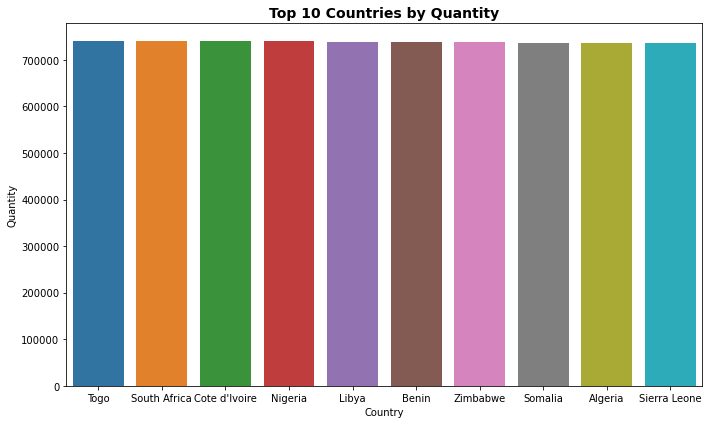

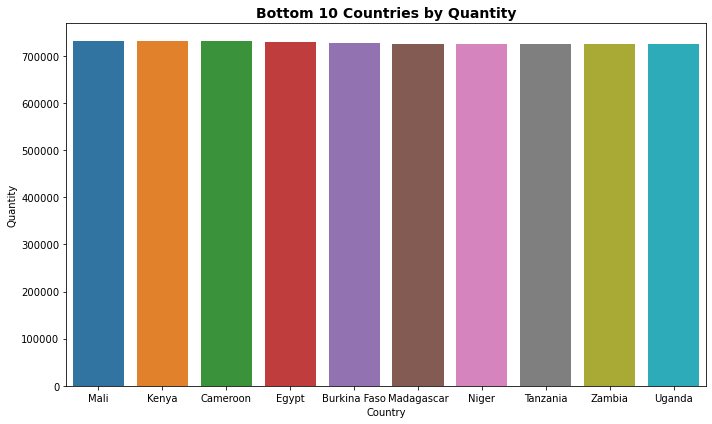

In [152]:
# Quantity by country
quantity_by_country = data.groupby(['Country'])['Quantity'].sum().reset_index()
# Sort the values, in descending order
quantity_by_country = quantity_by_country.sort_values('Quantity', ascending=False)
# Visualize top 10 countries
top_10_countries = quantity_by_country.head(10)
# Visualize bottom 10 countries by quantity
bottom_10_countries = quantity_by_country.tail(10)
plt.figure(figsize = (10,6))
sns.barplot(x='Country', y='Quantity', data=top_10_countries)
plt.title('Top 10 Countries by Quantity', fontsize=14, fontweight='bold')
plt.xlabel('Country')
plt.ylabel('Quantity')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

plt.figure(figsize = (10,6))
sns.barplot(x='Country', y='Quantity', data=bottom_10_countries)
plt.title('Bottom 10 Countries by Quantity', fontsize=14, fontweight='bold')
plt.xlabel('Country')
plt.ylabel('Quantity')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [108]:

data['CustomerID'] = data['CustomerID'].astype('str')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   InvoiceDate  406829 non-null  datetime64[ns]
 2   CustomerID   406829 non-null  object        
 3   StockCode    406829 non-null  object        
 4   Description  406829 non-null  object        
 5   Quantity     406829 non-null  int64         
 6   UnitPrice    406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.9+ MB


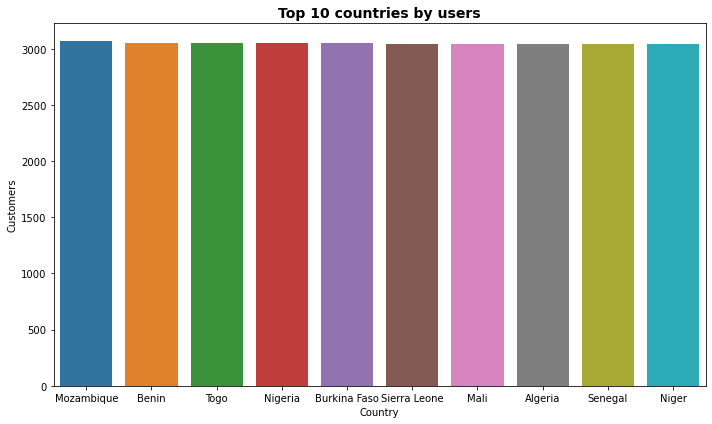

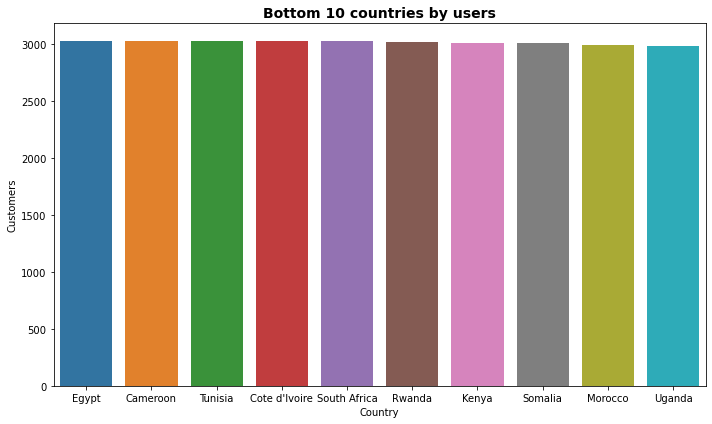

In [151]:
# Define the unique customers by country
customers_by_country = data.groupby(['Country'])['CustomerID'].nunique().reset_index()
# Rename column
customers_by_country.rename(columns = {'CustomerID': 'Customers'}, inplace=True)
customers_by_country = customers_by_country.sort_values('Customers', ascending=False)
# Visualize top 10 countries by number of users
top_10 = customers_by_country.head(10)
bottom_10 = customers_by_country.tail(10)
plt.figure(figsize = (10,6))
sns.barplot(x='Country', y='Customers', data=top_10)
plt.title('Top 10 countries by users',fontsize=14, fontweight='bold')
plt.xlabel('Country')
plt.ylabel('Customers')
plt.tight_layout()
plt.show()

plt.figure(figsize = (10,6))
sns.barplot(x='Country', y='Customers', data=bottom_10)
plt.title('Bottom 10 countries by users', fontsize=14, fontweight='bold')
plt.xlabel('Country')
plt.ylabel('Customers')
plt.tight_layout()
plt.show()

**Trend of sales**

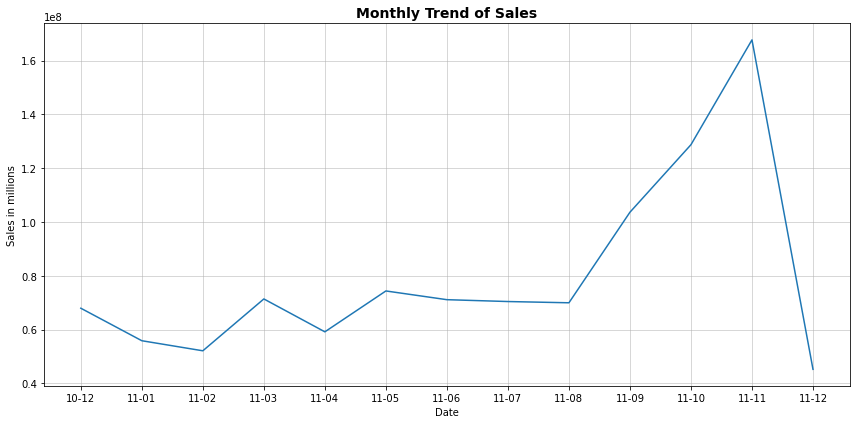

In [146]:
#  Claculate the Sales column
data['Sales'] = data['Quantity'] * data['UnitPrice']
# Extract Year-Month
data['Year-Month'] = data['InvoiceDate'].dt.to_period('M')

# Monthly sales
monthly_sales = data.groupby(['Year-Month'])['Sales'].sum()

#monthly_sales
plt.figure(figsize=(12,6))
sns.lineplot(x=monthly_sales.index.strftime('%y-%m'), y=monthly_sales.values, data=monthly_sales, ci=None)
plt.title('Monthly Trend of Sales',fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Sales in millions')
plt.xticks(rotation=0)
plt.grid(True, which='both',linewidth=0.5)
plt.tight_layout()
plt.show()

**Insights**

- December 2010 to August 2011: Noticeable fluctuations in sales quantity.
- August 2011 to November 2011: A significant sales increase occurred.
- November 2011 to December 2011: Sales experienced a sudden and substantial decline.

**Cohort Analysis**

1. **Define Cohort Date**

In [113]:
# Extract Invoice Month feature
def get_month(x):
    return dt.datetime(x.year, x.month, 1)
data["InvoiceDate"] = data["InvoiceDate"].apply(get_month)


In [114]:
def get_cohort_date(data):
    """
    Function takes in dataframe and returns cohort date
    where cohort date is the first date a customer made a purchase
    """
    # assign the first date a customer made a purchase to each unique customer
    data['CohortDate'] = data.groupby(['CustomerID'])['InvoiceDate'].transform("min")
    return data["CohortDate"]
data["CohortDate"] = get_cohort_date(data)

In [115]:
data

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,Sales,Year-Month,CohortDate
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt,664.95,2010-12,2010-12-01
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali,1862.95,2010-12,2010-12-01
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali,4796.22,2010-12,2010-12-01
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa,370.95,2010-12,2010-12-01
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda,1941.50,2010-12,2010-12-01
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-01,12680.0,SC5440,Furniture,25,36.53,Mozambique,913.25,2011-12,2011-08-01
541905,581587,2011-12-01,12680.0,SC3576,Cloths,94,90.65,Tunisia,8521.10,2011-12,2011-08-01
541906,581587,2011-12-01,12680.0,SC5283,Furniture,14,40.07,Somalia,560.98,2011-12,2011-08-01
541907,581587,2011-12-01,12680.0,SC1099,Cosmetics,45,79.83,Senegal,3592.35,2011-12,2011-08-01


2. **Extract Cohort Index**

The cohort Index is a measure of the time interval  in months since a particular cohort made their first purchase.
Index 4 for instance, indicates that this cohort made their first purchase 4 months ago. The cohort index is the difference between the Cohort Date and Invoice Date i.e. recent purchase time.

In [120]:
# Define a function that extract year and month from the first and last cohort date
def get_year_and_month(data,col):
    month = data[col].dt.month
    year = data[col].dt.year
    return month, year

# Apply to cohort first date column
first_month, first_year = get_year_and_month(data,"CohortDate" )
# Apply to cohort latest date column
latest_month, latest_year = get_year_and_month(data, "InvoiceDate")

In [121]:
# Function to create cohort index
def create_cohort_index(first_month, first_year, latest_month, latest_year):
    """
    this function takes in the first and latest month and year and 
    returns the calculated period the customer has been active, in months
    index: duration between the first and last purchase
    """
    year_diff = latest_year - first_year
    month_diff = latest_month - first_month
    index = year_diff *12 + month_diff +1
    return index
data['CohortIndex'] = create_cohort_index(first_month, first_year, latest_month, latest_year)
data
    

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,Sales,Year-Month,CohortDate,CohortIndex
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt,664.95,2010-12,2010-12-01,1
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali,1862.95,2010-12,2010-12-01,1
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali,4796.22,2010-12,2010-12-01,1
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa,370.95,2010-12,2010-12-01,1
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda,1941.50,2010-12,2010-12-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-01,12680.0,SC5440,Furniture,25,36.53,Mozambique,913.25,2011-12,2011-08-01,5
541905,581587,2011-12-01,12680.0,SC3576,Cloths,94,90.65,Tunisia,8521.10,2011-12,2011-08-01,5
541906,581587,2011-12-01,12680.0,SC5283,Furniture,14,40.07,Somalia,560.98,2011-12,2011-08-01,5
541907,581587,2011-12-01,12680.0,SC1099,Cosmetics,45,79.83,Senegal,3592.35,2011-12,2011-08-01,5


In [125]:

# Group data by CohortDate and CohortIndex, and count unique CustomerIDs
cohort_data = data.groupby(['CohortDate', 'CohortIndex'])['CustomerID'].nunique().reset_index()

# Rename the 'CustomerID' column to 'Customers' for better clarity
cohort_data.rename(columns={"CustomerID": "Customers"}, inplace=True)

# Pivot the data to create a matrix where rows represent CohortDate, columns represent CohortIndex, and values represent the number of unique Customers
cohortdata = cohort_data.pivot(index='CohortDate', columns='CohortIndex', values='Customers')

# Display the pivoted cohort data
cohortdata
```

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortDate,,,,,,,,,,,,,
2010-12-01,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02-01,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03-01,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04-01,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05-01,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


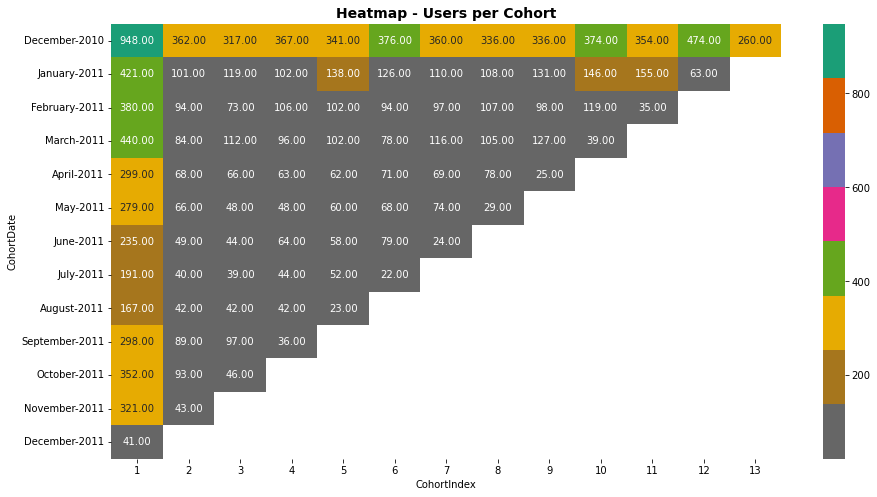

In [148]:
# Convert Index to a readable format
cohortdata.index = cohortdata.index.strftime("%B-%Y")
# Plot heatmap
plt.figure(figsize=(15,8))
sns.heatmap(cohortdata, annot=True,cmap= 'Dark2_r', fmt=".2f")
plt.title("Heatmap - Users per Cohort", fontsize=14, fontweight='bold')
plt.show()

**Average Quantity bought by each cohort**

In [138]:
average_quantity = data.groupby(['CohortDate', 'CohortIndex'])['Quantity'].mean().reset_index()
average_quantity['Quantity'] = average_quantity['Quantity'].round(1)
#Rename the Quantity column
average_quantity.rename(columns={'Quantity': 'Avg. Quantity'}, inplace=True)
average_quantity

,CohortDate,CohortIndex,Avg. Quantity
0,2010-12-01,1,50.3
1,2010-12-01,2,50.3
2,2010-12-01,3,50.4
3,2010-12-01,4,50.6
4,2010-12-01,5,50.6
...,...,...,...
86,2011-10-01,2,49.9
87,2011-10-01,3,49.4
88,2011-11-01,1,51.1
89,2011-11-01,2,48.6


In [139]:
#pivot the table 
quantity_pivot = average_quantity.pivot(index='CohortDate', columns=['CohortIndex'], values='Avg. Quantity')
# Convert index to the name of the month and year
quantity_pivot.index = quantity_pivot.index.strftime('%B %Y')
quantity_pivot

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortDate,,,,,,,,,,,,,
December 2010,50.3,50.3,50.4,50.6,50.6,50.4,50.5,50.5,50.2,50.6,50.5,50.6,50.7
January 2011,50.7,50.6,50.8,50.6,50.9,50.4,50.3,50.4,50.5,49.9,50.6,50.5,NaN
February 2011,51.2,49.7,51.0,50.3,50.2,50.7,49.2,50.7,50.9,49.6,50.1,NaN,NaN
March 2011,50.5,50.2,50.2,50.2,50.1,50.6,50.0,51.1,50.1,50.4,NaN,NaN,NaN
April 2011,50.7,49.9,50.0,50.1,50.6,50.3,50.3,49.9,51.1,NaN,NaN,NaN,NaN
May 2011,50.7,49.4,50.2,49.7,51.2,50.5,49.9,51.4,NaN,NaN,NaN,NaN,NaN
June 2011,50.6,51.0,48.5,50.6,51.4,50.9,50.3,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,50.7,49.5,50.8,50.1,49.8,50.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,50.5,49.8,50.4,51.0,50.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


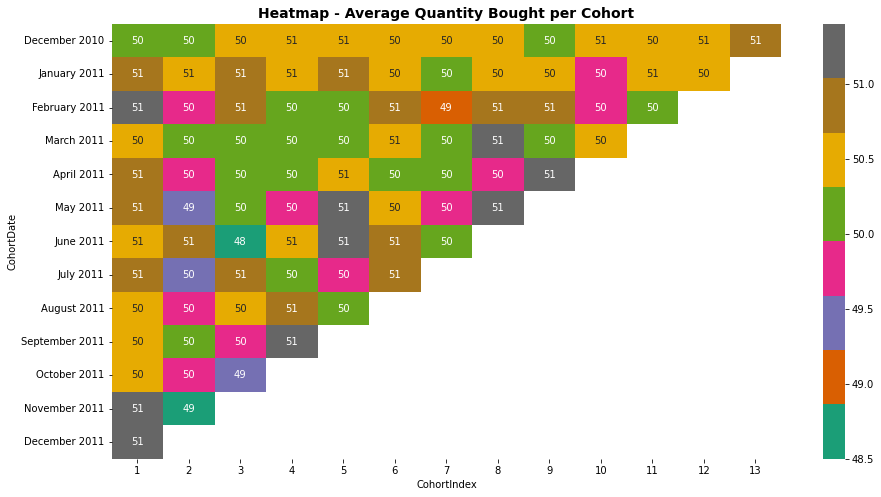

In [149]:
# Visualize using a heatmap
plt.figure(figsize = (15,8))
sns.heatmap(quantity_pivot, annot=True, cmap ='Dark2')
plt.title("Heatmap - Average Quantity Bought per Cohort", fontsize=14, fontweight='bold')
plt.show()

**Insights**

The Average Quantity bought is almost constant after a few months. While there maybe fluctuations in customer retention, the volume of sales does not fluctuate, indicating that few customers purchase a large quantity of products.
Target marketing can be increased in countries where more quantity is sold, rather than where more customers are acquired e.g. Tunisia, South Africa, Rwanda, Somalia etc


**Analyse the Retention Rate**



In [128]:
# Calculate the Retention Rates 
cohort_retention_table = cohortdata.divide(cohortdata.iloc[:,0], axis=0)
cohort_retention_table

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortDate,,,,,,,,,,,,,
December-2010,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
January-2011,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
February-2011,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
March-2011,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
April-2011,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
May-2011,1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
June-2011,1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
July-2011,1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August-2011,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


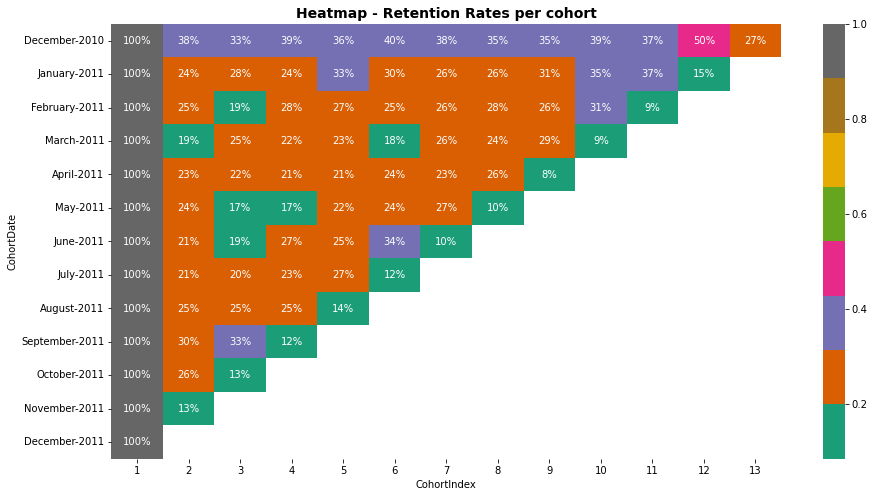

In [150]:
# Visualize the retention rates for each cohort in a heatmap
plt.figure(figsize=(15,8))
sns.heatmap(cohort_retention_table, annot=True, cmap='Dark2', fmt='.0%')
plt.title("Heatmap - Retention Rates per cohort", fontsize=14, fontweight='bold')
plt.show()

The retenton rate is in the range 20% and 40%, ie 20% to 40% of customers continue to make purchases from the eccomerce platform

- **December 2010 Cohort Outperforms Others:** The fact that the **December 2010** cohort has a retention rate above **30%** is a positive sign. It suggests that this group of customers has remained engaged with the e-commerce platform over time. This could be due to various factors, such as the quality of your products/services, effective marketing, or a strong customer retention strategy.
- **Decline in December 2011:** The observation that all cohorts have low retention rates in December 2011 suggests that there may have been specific challenges or issues affecting customer retention during that time. It's important to investigate what might have caused this decline and whether it's a one-time event or a recurring pattern
- **Variability in Retention Rates:** The range of retention rates, from a **minimum of 8% to a maximum of 50%**, suggests that there is significant variability in how different cohorts of customers are behaving. While 8% is relatively low, 50% is relatively high, considering the standard e-commerce retention rates mentioned earlier.

**RECOMMENDATIONS**

- **Identify Factors Driving High Retention (December 2010):** Analyze what factors have contributed to the high retention rate for the December 2010 cohort. Was there a specific marketing campaign, product improvement, or customer engagement strategy that worked well for this group? Try to replicate successful strategies for other cohorts.

- **Investigate December 2011 Drop:** Investigate why all cohorts have low retention rates on December 2011. It might involve analyzing customer feedback, product quality, customer service, or any changes in your business operations during that time. Identifying and addressing the root causes of this drop is crucial for improving future retention rates.

- **Set Realistic Targets:** While the standard e-commerce retention rate range is 20% to 40%, it's essential to set targets that are specific to the business and its circumstances. Aim to improve retention rates gradually over time based on your historical data and industry benchmarks.

- **Implement Retention Strategies:** Develop and implement retention strategies that are tailored to different cohorts of customers. Personalized marketing, loyalty programs, and targeted communication can help improve retention rates.

- **Continuously Monitor and Adapt:** Retention rates can change over time due to various factors, so it's crucial to continuously monitor them and adapt your strategies accordingly. Regularly analyzing cohort data and customer behavior will help the business make informed decisions to improve retention.